In [60]:
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [61]:
#definição de variáveis
H_s, H_jw, mod_H_jw, phi, Vi, R1, R2, C, R3, Vo, V1, s, t, w = symbols("H_s H_jw |H_jw| phi Vi R1 R2 C R3 Vo V1 s t w")

In [62]:
eq1 = Eq(V1, -Vo*(1/(C*s))/R3)
eq1

Eq(V1, -Vo/(C*R3*s))

In [63]:
eq2 = Eq((Vi-V1)/R1, ((V1-Vo)/(1/(C*s)))+(V1/(1/(C*s)))+(V1/R2))
eq2

Eq((-V1 + Vi)/R1, C*V1*s + C*s*(V1 - Vo) + V1/R2)

In [64]:
eqVo = linsolve([eq1,eq2], (Vo,V1))
eqVo

{(-C*R2*R3*Vi*s/(C**2*R1*R2*R3*s**2 + 2*C*R1*R2*s + R1 + R2), R2*Vi/(C**2*R1*R2*R3*s**2 + 2*C*R1*R2*s + R1 + R2))}

In [65]:
# Calculando a função transferência H(s)

solVo = eqVo.args[0][0]
Hs = solVo/Vi
Eq(H_s, Hs)

Eq(H_s, -C*R2*R3*s/(C**2*R1*R2*R3*s**2 + 2*C*R1*R2*s + R1 + R2))

In [66]:
# Substituindo s = jw

Hjw = Hs.subs(s, I*w)
Eq(H_jw,Hjw)

Eq(H_jw, -I*C*R2*R3*w/(-C**2*R1*R2*R3*w**2 + 2*I*C*R1*R2*w + R1 + R2))

In [67]:
Eq(mod_H_jw,abs(Hjw))

Eq(|H_jw|, Abs(C*R2*R3*w/(-C**2*R1*R2*R3*w**2 + 2*I*C*R1*R2*w + R1 + R2)))

In [68]:
#resposta em radiano, se liga
Eq(phi,deg(arg(Hjw)))

Eq(phi, 180*arg(-I*C*R2*R3*w/(-C**2*R1*R2*R3*w**2 + 2*I*C*R1*R2*w + R1 + R2))/pi)

In [69]:
H_subs=Hjw.subs({C:100e-9, R1:470, R2:470, R3:47e+3})
Eq(H_jw,H_subs)

Eq(H_jw, -2.209*I*w/(-0.000103823*w**2 + 0.04418*I*w + 940))

In [70]:
#freq 40Hz
Mod1=abs(H_subs)
Arg1=deg(arg(H_subs))
float(Mod1.subs(w,2*pi*40)), float(Arg1.subs(w,2*pi*40))

(0.5947268235758382, -90.6815228100342)

In [71]:
#w_40 = arg(0.59) theta(-90°)

In [72]:
# calcular o módulo e o argumento em cada frequência

def calcular_respostas(frequencias, Yo, Uo, cursor_diff_2_1):
    resultados = []
    for i, freq in enumerate(frequencias):  # Usando enumerate para indexar corretamente
        omega = 2 * pi * freq
        Mod = Abs(H_subs)
        Arg = deg(arg(H_subs))
        Mod_value = float(Mod.subs(w, omega))
        Arg_value = float(Arg.subs(w, omega))
        Periodo = 1 / freq
        Mod_Hjw = Yo[i] / Uo[i] 
        Phase = 360*cursor_diff_2_1[i]/Periodo

        resultados.append({
            'Frequência (Hz)': freq,
            'Módulo_Python': Mod_value,
            'Argumento_Python (Deg)': Arg_value,
            'Período (s)': Periodo,
            'Yo': Yo[i],
            'Uo': Uo[i],
            '|H(jω)| LTSpice': abs(Mod_Hjw),
            "Fase LTSpice (Deg)": Phase
        })

    return resultados

# Lista de frequencias em Hz
frequencias = [40, 100, 200, 400, 480, 550, 1100, 2200, 5500, 11000]
Yo = [59.47e-3, 154.69e-3, 353.21e-3, 2.29, -4.87, 1.99, 298.51e-3, -163.90e-3, -58.92e-3, -28.93e-3]
Uo = [99.91e-3, 99.93e-3, 99.96e-3,  99.93e-3, -99.97e-3, 99.95e-3, 99.83e-3, 99.85e-3, 99.76e-3,99.86e-3]
cursor_diff_2_1 = [-6.24e-3, -2.49e-3, -1.28e-3,  -797.95e-6, 1.04e-3, 595.88e-6, 243.77e-6, 123.76e-6, 47.17e-6,23.47e-6]

resultados = calcular_respostas(frequencias, Yo, Uo, cursor_diff_2_1)
df = pd.DataFrame(resultados)
df

,Frequência (Hz),Módulo_Python,Argumento_Python (Deg),Período (s),Yo,Uo,|H(jω)| LTSpice,Fase LTSpice (Deg)
0,40,0.594727,-90.681523,0.025000,0.05947,0.09991,0.595236,-89.85600
1,100,1.543132,-91.768580,0.010000,0.15469,0.09993,1.547984,-89.64000
2,200,3.567860,-94.091944,0.005000,0.35321,0.09996,3.533513,-92.16000
3,400,18.195645,-111.340696,0.002500,2.29000,0.09993,22.916041,-114.90480
4,480,49.973301,178.127517,0.002083,-4.87000,-0.09997,48.714614,179.71200
5,550,22.685372,116.981800,0.001818,1.99000,0.09995,19.909955,117.98424
6,1100,3.787440,94.344247,0.000909,0.29851,0.09983,2.990183,96.53292
7,2200,1.614935,91.850901,0.000455,-0.16390,0.09985,1.641462,98.01792
8,5500,0.620342,90.710878,0.000182,-0.05892,0.09976,0.590617,93.39660
9,11000,0.308422,90.353428,0.000091,-0.02893,0.09986,0.289706,92.94120


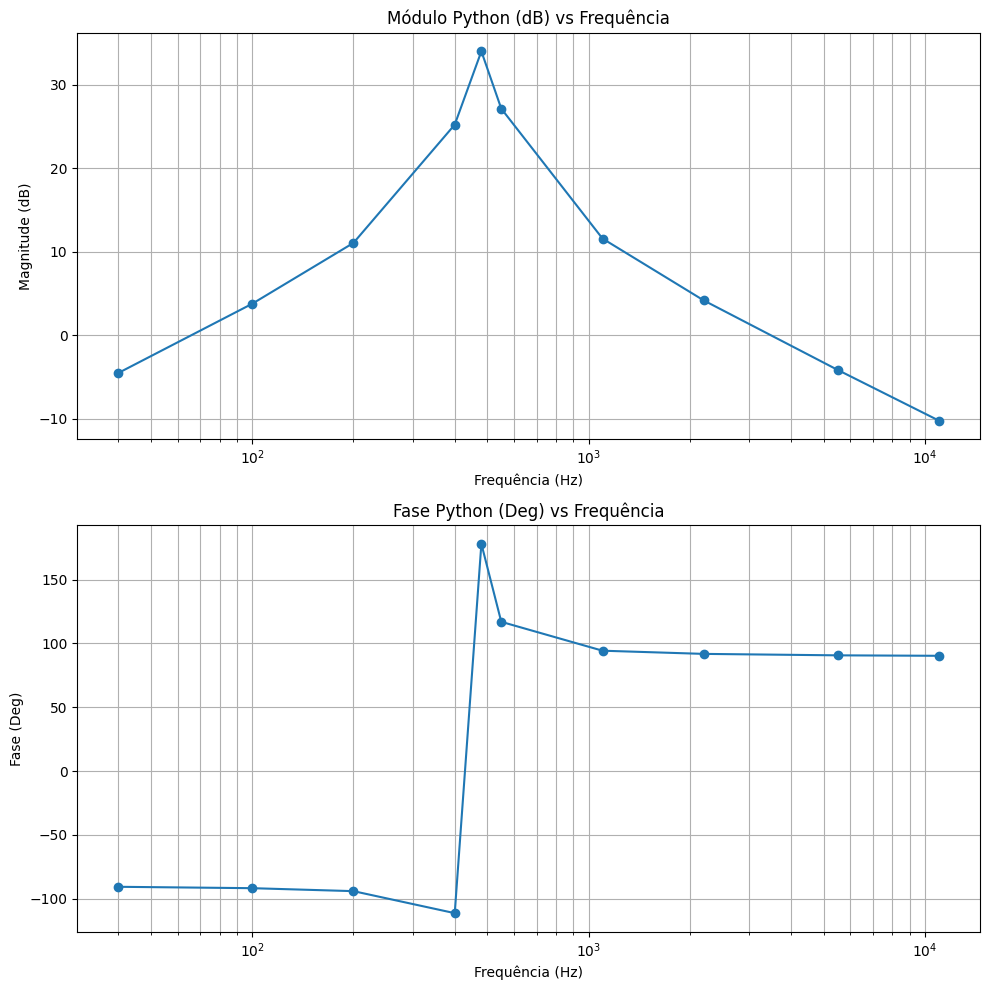

In [73]:
# Convertendo módulo para dB 
df['Módulo_Python'] = 20 * np.log10(df['Módulo_Python'])

# Plotando o diagrama de Bode
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Módulo em dB
axs[0].semilogx(df['Frequência (Hz)'], df['Módulo_Python'], marker='o', linestyle='-')
axs[0].set_title('Módulo Python (dB) vs Frequência')
axs[0].set_xlabel('Frequência (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].grid(True, which="both", ls="-")

# Fase em graus
axs[1].semilogx(df['Frequência (Hz)'], df['Argumento_Python (Deg)'], marker='o', linestyle='-')
axs[1].set_title('Fase Python (Deg) vs Frequência')
axs[1].set_xlabel('Frequência (Hz)')
axs[1].set_ylabel('Fase (Deg)')
axs[1].grid(True, which="both", ls="-")

plt.tight_layout()
plt.show()

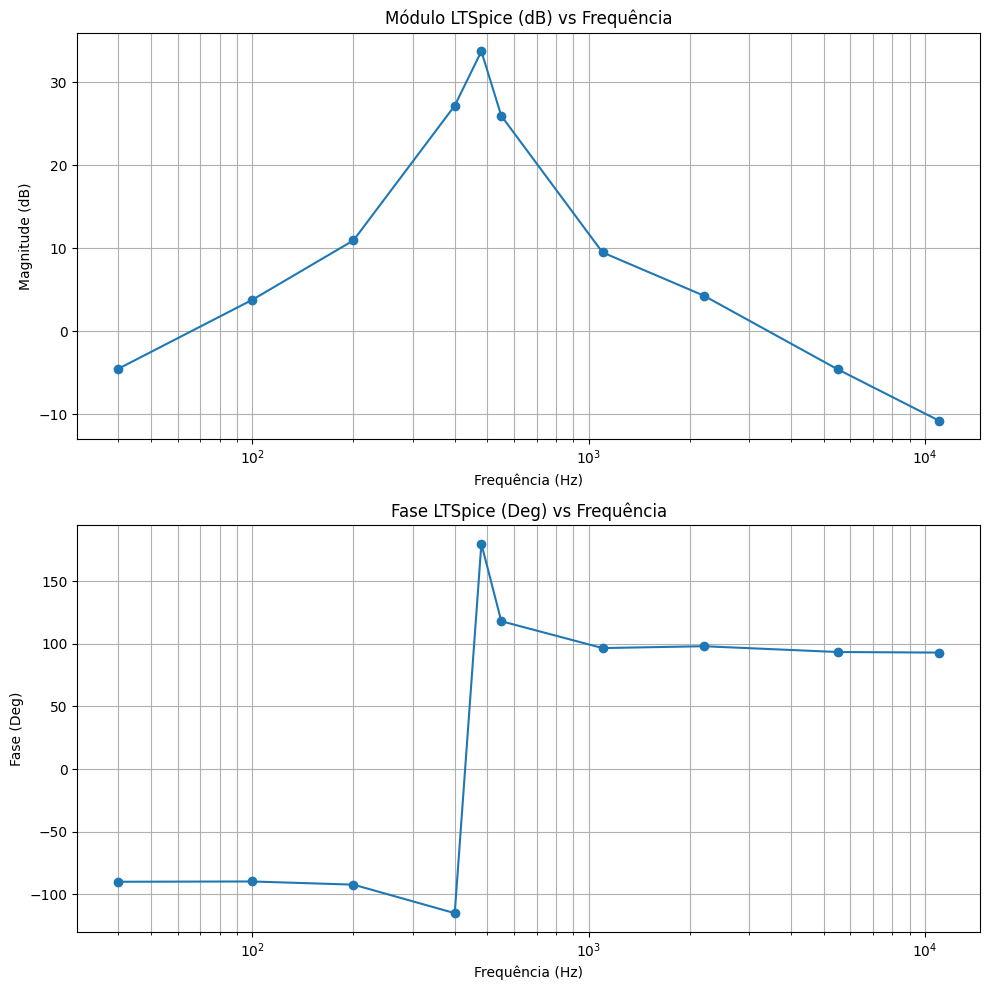

In [74]:
# Convertendo módulo para dB 
df['|H(jω)| LTSpice (dB)'] = 20 * np.log10(df['|H(jω)| LTSpice'])

# Plotando o diagrama de Bode
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Módulo em dB
axs[0].semilogx(df['Frequência (Hz)'], df['|H(jω)| LTSpice (dB)'], marker='o', linestyle='-')
axs[0].set_title('Módulo LTSpice (dB) vs Frequência')
axs[0].set_xlabel('Frequência (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].grid(True, which="both", ls="-")

# Fase em graus
axs[1].semilogx(df['Frequência (Hz)'], df['Fase LTSpice (Deg)'], marker='o', linestyle='-')
axs[1].set_title('Fase LTSpice (Deg) vs Frequência')
axs[1].set_xlabel('Frequência (Hz)')
axs[1].set_ylabel('Fase (Deg)')
axs[1].grid(True, which="both", ls="-")

plt.tight_layout()
plt.show()

In [75]:
# calcular o módulo e o argumento em cada frequência

def calcular_respostas_protoboard(frequencias, Yo, Uo, cursor_diff_2_1):
    resultados = []
    for i, freq in enumerate(frequencias):  # Usando enumerate para indexar corretamente
        omega = 2 * pi * freq
        Mod = Abs(H_subs)
        Arg = deg(arg(H_subs))
        Mod_value = float(Mod.subs(w, omega))
        Arg_value = float(Arg.subs(w, omega))
        Periodo = 1 / freq
        Mod_Hjw = Yo[i] / Uo[i] 
        Phase = cursor_diff_2_1[i]

        resultados.append({
            'Frequência (Hz)': freq,
            'Módulo_Python': Mod_value,
            'Argumento_Python (Deg)': Arg_value,
            'Período (s)': Periodo,
            'Yo': Yo[i],
            'Uo': Uo[i],
            '|H(jω)| Protoboard': abs(Mod_Hjw),
            "Fase Protoboard (Deg)": Phase
        })

    return resultados

# Lista de frequencias em Hz
frequencias = [40, 100, 200, 400, 480, 550, 1100, 2200, 5500, 11000]
Yo_proto = [109.7e-3, 287.9e-3, 194.7e-3, 3.402, 189.3e-3, 163.2e-3, 183.3e-3, 185.3e-3, 184.4e-3, 187.7e-3]
Uo_proto = [192.8e-3, 193.1e-3, 657.5e-3, 210.9e-3, 8.41, 3.995, 703e-3, 306.8e-3, 136.9e-3, 100.6e-3]
cursor_diff_2_1_proto = [89.8, 92.5, 94.6, 110.5, 167.1, -121.6, -94.7, -93.4, -100, -102.5]

resultados = calcular_respostas_protoboard(frequencias, Yo_proto, Uo_proto, cursor_diff_2_1_proto)
df_proto = pd.DataFrame(resultados)
df_proto

,Frequência (Hz),Módulo_Python,Argumento_Python (Deg),Período (s),Yo,Uo,|H(jω)| Protoboard,Fase Protoboard (Deg)
0,40,0.594727,-90.681523,0.025000,0.1097,0.1928,0.568983,89.8
1,100,1.543132,-91.768580,0.010000,0.2879,0.1931,1.490937,92.5
2,200,3.567860,-94.091944,0.005000,0.1947,0.6575,0.296122,94.6
3,400,18.195645,-111.340696,0.002500,3.4020,0.2109,16.130868,110.5
4,480,49.973301,178.127517,0.002083,0.1893,8.4100,0.022509,167.1
5,550,22.685372,116.981800,0.001818,0.1632,3.9950,0.040851,-121.6
6,1100,3.787440,94.344247,0.000909,0.1833,0.7030,0.260740,-94.7
7,2200,1.614935,91.850901,0.000455,0.1853,0.3068,0.603977,-93.4
8,5500,0.620342,90.710878,0.000182,0.1844,0.1369,1.346969,-100.0
9,11000,0.308422,90.353428,0.000091,0.1877,0.1006,1.865805,-102.5


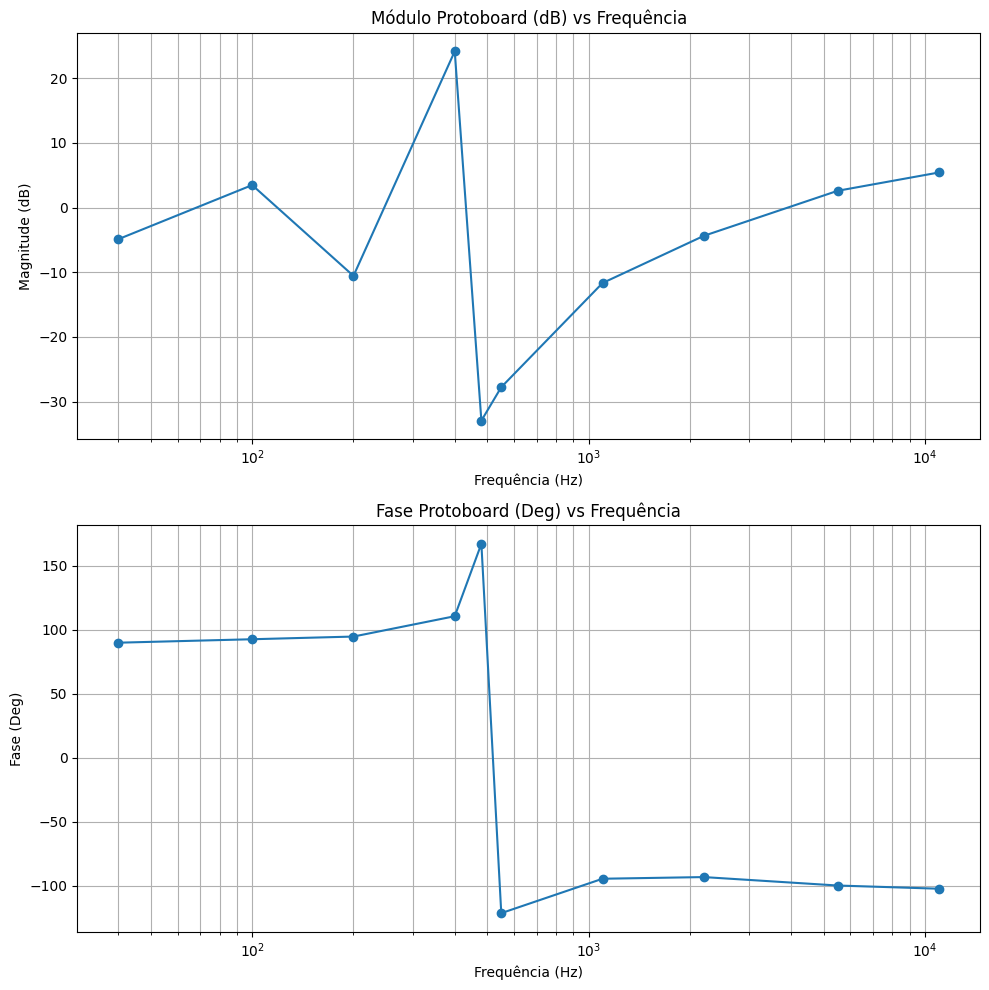

In [76]:
# Convertendo módulo para dB 
df_proto['|H(jω)| Protoboard (dB)'] = 20 * np.log10(df_proto['|H(jω)| Protoboard'])

# Plotando o diagrama de Bode
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Módulo em dB
axs[0].semilogx(df_proto['Frequência (Hz)'], df_proto['|H(jω)| Protoboard (dB)'], marker='o', linestyle='-')
axs[0].set_title('Módulo Protoboard (dB) vs Frequência')
axs[0].set_xlabel('Frequência (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].grid(True, which="both", ls="-")

# Fase em graus
axs[1].semilogx(df_proto['Frequência (Hz)'], df_proto['Fase Protoboard (Deg)'], marker='o', linestyle='-')
axs[1].set_title('Fase Protoboard (Deg) vs Frequência')
axs[1].set_xlabel('Frequência (Hz)')
axs[1].set_ylabel('Fase (Deg)')
axs[1].grid(True, which="both", ls="-")

plt.tight_layout()
plt.show()